In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import os
from glob import glob

import seaborn as sns
from matplotlib import pyplot as plt
from samecode.survival.plot import KMPlot
from sklearn.model_selection import train_test_split
from lifelines.utils import concordance_index as lfcindex

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white', font_scale=1.5)

In [2]:
def read_fd_csvs(csv_reg, cohort, model_name,  learning_type):
    csvs = glob(csv_reg)
    res = []
    for csv in csvs:
        fd = int(csv.split('/')[-2].split('-')[-1])
        df = pd.read_csv(csv)
        df = df[['epoch','val_sigmoid_concordance']]
        df['fold'] = fd
        df['cohort'] = cohort
        df['model_name'] = model_name
        df['learning_type'] = learning_type
        res.append(df)
    return pd.concat(res)

In [3]:
Model_NAMES = ['Vanilla ClinicalTransformer',
              'ssGSEA43 + ClinicalTransformer',
              'COMPASS + ClinicalTransformer',]

Model_PATHS = ['01_run_Feg29_TME',
              '02_run_ssGSEA43_TME',
              '03_run_Com44_TME',]

cohort = 'IMvigor210'

Learning_TYPES = ['Survival', 'TransferLearningSurvival']

ci = 60

In [4]:
res = []
for i in range(3):
    model_name = Model_NAMES[i]
    mpt = Model_PATHS[i]
    for learning_type in Learning_TYPES:
        if learning_type == 'Survival':
            p = f'../Clinical_Transformer/04_Clinical_Transformer/{mpt}/{cohort}/results/{learning_type}/*/history.csv'
        else:
            p = f'../Clinical_Transformer/04_Clinical_Transformer/{mpt}/{cohort}/results/{learning_type}/*/*/history.csv'
            
        df = read_fd_csvs(p, cohort = cohort, 
                   model_name = model_name, 
                   learning_type = learning_type)
        res.append(df)
dfp = pd.concat(res)

In [5]:
dfp.cohort = 'IMVigor210'

In [6]:
#dfp.to_csv(f'./results/{cohort}_ClinicalTransformer_validation.csv')

In [7]:
dfp.head()

,epoch,val_sigmoid_concordance,fold,cohort,model_name,learning_type
0,0,0.553192,1,IMVigor210,Vanilla ClinicalTransformer,Survival
1,1,0.545532,1,IMVigor210,Vanilla ClinicalTransformer,Survival
2,2,0.551489,1,IMVigor210,Vanilla ClinicalTransformer,Survival
3,3,0.560851,1,IMVigor210,Vanilla ClinicalTransformer,Survival
4,4,0.565957,1,IMVigor210,Vanilla ClinicalTransformer,Survival


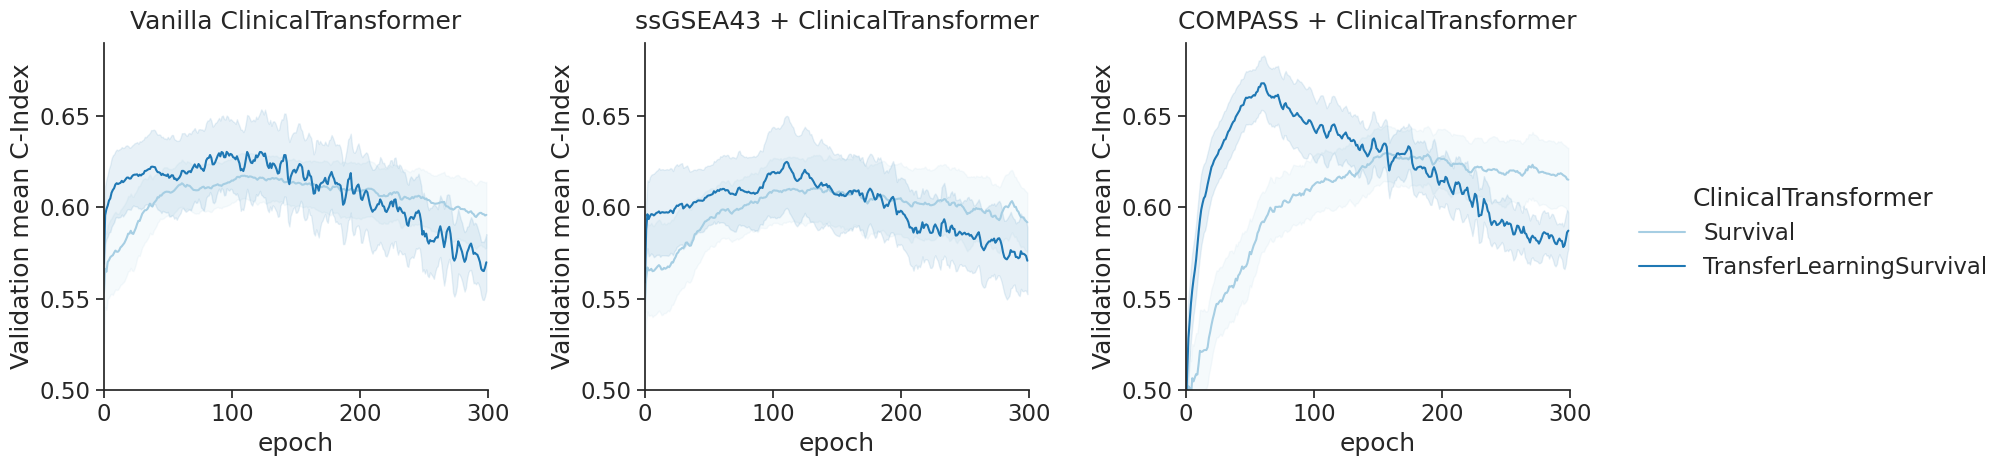

In [8]:
fig, axes = plt.subplots(ncols=3, figsize=(5.5*3, 5), sharey=False)

for i in range(3):
    model_name = Model_NAMES[i]
    ax = axes[i]
    data = dfp[dfp.model_name == model_name]
    sns.lineplot(
        data=data, x='epoch',
        y='val_sigmoid_concordance',
        hue='learning_type', ax=ax, errorbar='se', #('ci', ci)
        palette='Paired' 
    )

    for artist in ax.collections:
        if artist.__class__.__name__ == 'PolyCollection':
            artist.set_alpha(0.1)

    ax.set_ylim(0.5, 0.69)
    ax.set_xlim(0, 300)
    ax.tick_params(bottom=True, left=True)
    ax.set_ylabel('Validation mean C-Index')
    ax.set_title(model_name, pad = 10)
    sns.despine()

    if ax.get_legend() is not None:
        ax.get_legend().remove()

# 从第一个子图提取 handles 和 labels
handles, labels = axes[0].get_legend_handles_labels()

# 在 figure 右侧加一个共享 legend
fig.legend(handles, labels,
           title="ClinicalTransformer", 
           loc='center left',         # 锚点在右侧中间
           bbox_to_anchor=(1.0, 0.5), # (x=1.01 表示在绘图区右边外一点, y=0.5 表示垂直居中)
           frameon=False)

plt.tight_layout()
#plt.subplots_adjust(right=0.9)  # 给右侧留空间，避免子图被压缩得太紧

fig.savefig(f'./results/{cohort}_ClinicalTransformer_validation_acrosslearning.svg',
            bbox_inches = 'tight')

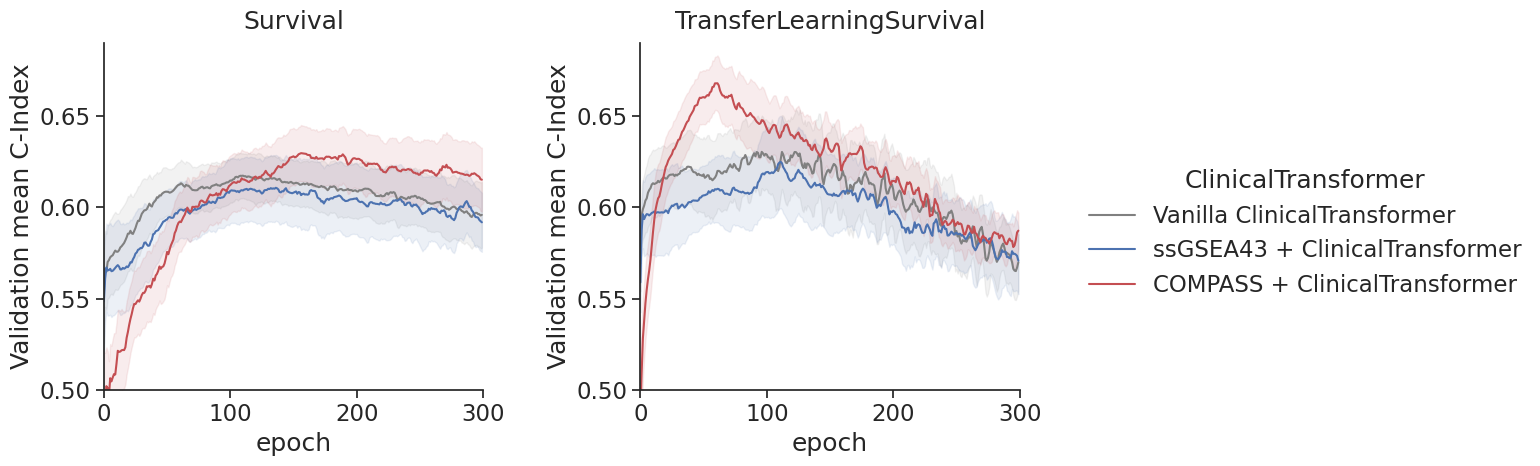

In [9]:
fig, axes = plt.subplots(ncols=2, figsize=(5.5*2, 5), sharey=False)

for i in range(2):
    learning_type = Learning_TYPES[i]
    ax = axes[i]
    data = dfp[dfp.learning_type == learning_type]
    sns.lineplot(
        data=data, x='epoch',
        y='val_sigmoid_concordance', hue_order = Model_NAMES,
        hue='model_name', ax=ax, errorbar= 'se',#('ci', ci),
        palette=['grey','b', 'r']
    )

    for artist in ax.collections:
        if artist.__class__.__name__ == 'PolyCollection':
            artist.set_alpha(0.1)

    ax.set_ylim(0.5, 0.69)
    ax.set_xlim(0, 300)
    ax.tick_params(bottom=True, left=True)
    ax.set_ylabel('Validation mean C-Index')
    ax.set_title(learning_type, pad = 10)
    sns.despine()

    if ax.get_legend() is not None:
        ax.get_legend().remove()

# 从第一个子图提取 handles 和 labels
handles, labels = axes[0].get_legend_handles_labels()

# 在 figure 右侧加一个共享 legend
fig.legend(handles, labels,
           title="ClinicalTransformer", 
           loc='center left',         # 锚点在右侧中间
           bbox_to_anchor=(1.0, 0.5), # (x=1.01 表示在绘图区右边外一点, y=0.5 表示垂直居中)
           frameon=False)

plt.tight_layout()
#plt.subplots_adjust(right=0.9)  # 给右侧留空间，避免子图被压缩得太紧

fig.savefig(f'./results/{cohort}_ClinicalTransformer_validation_acrossodel.svg',
            bbox_inches = 'tight')